In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

from datetime import datetime, date,timedelta
from matplotlib import gridspec
from matplotlib import cm

from yellowbrick.regressor import PredictionError, ResidualsPlot

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_pickle('MicroMetSV_30min.pkl')

In [3]:
df.head()

,TIMESTAMP_START,TIMESTAMP_END,G,SWC_1,SWC_2,SWC_3,SWC_4,SWC_5,SWC_6,TS_1,...,SV_MEAN_6A,SV_IN_7A,SV_OUT_7A,SV_MEAN_7A,SV_IN_8A,SV_OUT_8A,SV_MEAN_8A,SV_IN_9A,SV_OUT_9A,SV_MEAN_9A
0,201201010000,201201010030,-2.595333,NaN,NaN,NaN,NaN,NaN,NaN,24.073333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201201010030,201201010100,-2.882667,NaN,NaN,NaN,NaN,NaN,NaN,24.006667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201201010100,201201010130,-3.149000,NaN,NaN,NaN,NaN,NaN,NaN,23.903333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201201010130,201201010200,-3.426333,NaN,NaN,NaN,NaN,NaN,NaN,23.863333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201201010200,201201010230,-3.579333,NaN,NaN,NaN,NaN,NaN,NaN,23.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(list(df))

['TIMESTAMP_START', 'TIMESTAMP_END', 'G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'SW_IN', 'SW_OUT', 'LW_IN', 'LW_OUT', 'PPFD_IN', 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'PPFD_OUT', 'NETRAD', 'T_CANOPY', 'PA', 'P_1', 'P_2', 'BATTERY_VOLTAGE', 'T_LW_IN', 'T_LW_OUT', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 'WS_1', 'WD_1', 'WS_2', 'WS_3', 'WS_4', 'H2O_1', 'H2O_2', 'H2O_3', 'H2O_4', 'H2O_5', 'H2O_6', 'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 'LW_IN_CORR', 'LW_OUT_CORR', 'PPFD_IN_2', 'Rho_PAR', 'Rho_OIR', 'NDVI', 'TIMESTAMP', 'DOY', 'SV_IN_1A', 'SV_OUT_1A', 'SV_MEAN_1A', 'SV_IN_1B', 'SV_OUT_1B', 'SV_MEAN_1B', 'SV_IN_2A', 'SV_OUT_2A', 'SV_MEAN_2A', 'SV_IN_2B', 'SV_OUT_2B', 'SV_MEAN_2B', 'SV_IN_3A', 'SV_OUT_3A', 'SV_MEAN_3A', 'SV_IN_3B', 'SV_OUT_3B', 'SV_MEAN_3B', 'SV_IN_4A', 'SV_OUT_4A', 'SV_MEAN_4A', 'SV_IN_5A', 'SV_OUT_5A', 'SV_MEAN_5A', 'SV_IN_5B', 'SV_OUT_5B', 'SV_MEAN_5B', 'SV_IN_6A', 'SV_OUT_6A', 'SV_MEA

Noon

In [5]:
df_noon = df.loc[24::48]

# Time Period

Drought

In [6]:
# all drought
time_start = datetime(2015,8,1,0,0,0)
time_end = datetime(2016,3,1,0,0,0)

# very dry
# time_start = datetime(2015,9,1,0,0,0)
# time_end = datetime(2015,10,1,0,0,0)

In [7]:
df_drought = df_noon.loc[(df_noon['TIMESTAMP'] > time_start) & (df_noon['TIMESTAMP'] < time_end)]

In [8]:
# cols_drop = ['TIMESTAMP_START','TIMESTAMP_END','TIMESTAMP','BATTERY_VOLTAGE',
#              'H2O_1','H2O_2','H2O_3','H2O_4','H2O_5','H2O_6',
#              'RH_2','RH_3','RH_4','RH_5','P_2','RH_6',
#              'WS_4','Rho_PAR','Rho_OIR','NDVI',
#              'PPFD_IN','PPFD_OUT','T_LW_IN','T_LW_OUT','LW_IN','LW_OUT',
#              'PPFD_IN_2','PA']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 
#        'SW_IN', 'SW_OUT', 'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'WS_1', 'WD_1', 
#        'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 
#        'LW_IN_CORR', 'LW_OUT_CORR', 
#        'SV_OUT_1A']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 
#        'SW_IN', 'SW_OUT', 'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'WS_1', 
#        'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 
#        'SV_OUT_1A']
# cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
#        'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5',
#         'RH_1','NETRAD', 'T_CANOPY', 
#        'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
#        'CO2_1', 'CO2_2', 'CO2_3', 'CO2_4', 'CO2_5', 'CO2_6', 
#        'SV_OUT_5A']
cols = ['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 
       'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5',
        'RH_1','NETRAD', 'T_CANOPY', 
       'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 
       'SV_OUT_5A']

Assign df for feature selection

In [9]:
# df_fs = df[cols].copy()
df_fs = df_drought[cols].copy()
# df_fs = df_noon[cols].copy()

In [10]:
df_fs.head()

,G,SWC_1,SWC_2,SWC_3,SWC_4,SWC_5,SWC_6,TS_1,TS_2,TS_3,...,RH_1,NETRAD,T_CANOPY,TA_1,TA_2,TA_3,TA_4,TA_5,TA_6,SV_OUT_5A
62808,5.178667,0.391000,0.397,0.365000,0.324,0.294000,0.399000,25.933333,25.690000,25.526667,...,62.63,NaN,32.17,30.42,30.61,30.83,32.05,30.67,29.47,13.468421
62856,5.346667,0.389000,0.395,0.363000,0.323,0.294000,0.399000,26.206667,25.950000,25.746667,...,62.48,NaN,33.30,30.83,31.10,31.30,32.69,30.98,29.90,11.181179
62904,5.437667,0.386000,0.394,0.360333,0.321,0.293000,0.399000,26.226667,25.950000,25.743333,...,63.73,NaN,32.90,30.45,30.71,30.97,32.03,30.83,29.53,13.058303
62952,7.068667,0.382667,0.392,0.357667,0.319,0.292333,0.399000,26.430000,26.150000,25.950000,...,53.84,NaN,33.79,31.27,31.49,31.74,32.73,31.86,30.66,15.384604
63000,6.532667,0.378000,0.390,0.354333,0.316,0.291000,0.398333,26.533333,26.276667,26.070000,...,62.10,NaN,32.99,30.82,31.13,31.35,32.95,31.31,30.26,14.813655


In [11]:
df_fs.isna().sum()

G            11
SWC_1        11
SWC_2        11
SWC_3        11
SWC_4        11
SWC_5        11
SWC_6        11
TS_1         11
TS_2         11
TS_3         11
TS_4         11
TS_5         11
RH_1         26
NETRAD       37
T_CANOPY     26
TA_1         26
TA_2         26
TA_3         26
TA_4         26
TA_5         26
TA_6         26
SV_OUT_5A    97
dtype: int64

In [12]:
y_list = cols[-1]
cols_x = cols[:-2]
print(y_list)
print(cols_x)

SV_OUT_5A
['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'RH_1', 'NETRAD', 'T_CANOPY', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5']


In [13]:
print(list(df_fs))

['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'RH_1', 'NETRAD', 'T_CANOPY', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 'SV_OUT_5A']


In [14]:
df_ml = df_fs.dropna(axis = 0,how = 'any')
df_ml.shape

(92, 22)

In [15]:
# df_ml.to_pickle('SapVelocity_ML_Drought.pkl')

In [16]:
print(list(df_ml))

['G', 'SWC_1', 'SWC_2', 'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'RH_1', 'NETRAD', 'T_CANOPY', 'TA_1', 'TA_2', 'TA_3', 'TA_4', 'TA_5', 'TA_6', 'SV_OUT_5A']


# Machine Learning Models

In [17]:
X_org = df_ml.drop(y_list,axis = 1)
y_org = df_ml[y_list]

In [18]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y_org)

# Feature Importance 

[0.04319565 0.05390183 0.04967022 0.04548666 0.06500689 0.05110648
 0.03519462 0.03518949 0.03480344 0.04381032 0.0402888  0.06091608
 0.04751559 0.05814406 0.04749517 0.04192497 0.04898644 0.03992419
 0.05307731 0.05003029 0.0543315 ]


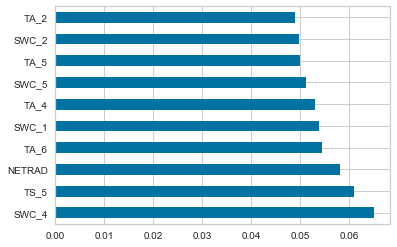

Feature ranking:
1. feature 4 (0.065007)
2. feature 11 (0.060916)
3. feature 13 (0.058144)
4. feature 20 (0.054332)
5. feature 1 (0.053902)
6. feature 18 (0.053077)
7. feature 5 (0.051106)
8. feature 19 (0.050030)
9. feature 2 (0.049670)
10. feature 16 (0.048986)
11. feature 12 (0.047516)
12. feature 14 (0.047495)
13. feature 3 (0.045487)
14. feature 9 (0.043810)
15. feature 0 (0.043196)
16. feature 15 (0.041925)
17. feature 10 (0.040289)
18. feature 17 (0.039924)
19. feature 6 (0.035195)
20. feature 7 (0.035189)
21. feature 8 (0.034803)


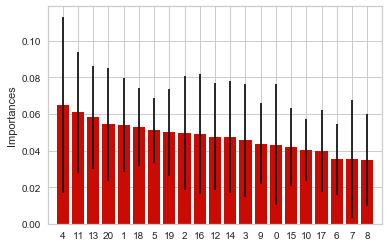

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
forest = RandomForestClassifier()
forest.fit(X_org,y_encoded)
print(forest.feature_importances_)
feat_importances = pd.Series(forest.feature_importances_, index=X_org.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_org.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
# plt.title("Feature importances")
plt.bar(range(X_org.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_org.shape[1]), indices)
plt.xlim([-1, X_org.shape[1]])
plt.ylabel("Importances")
plt.show()

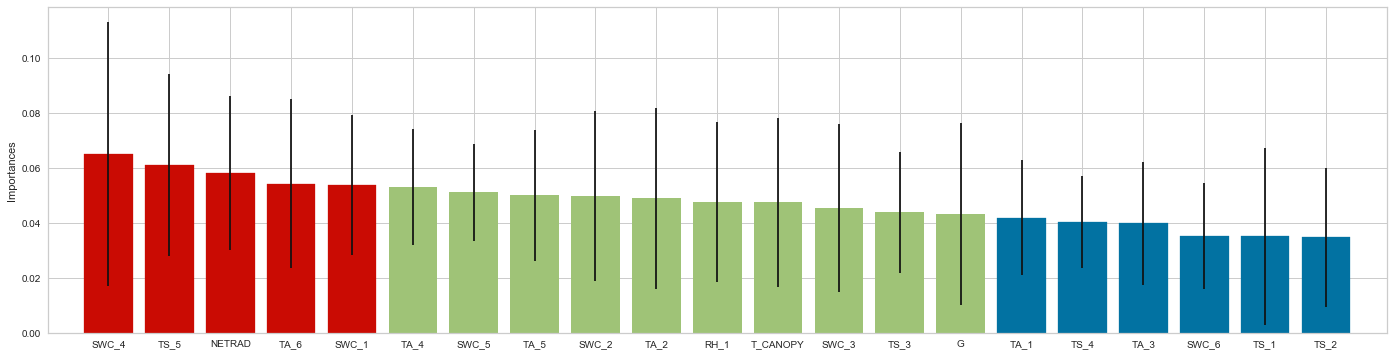

In [20]:
# Plot the feature importances of the forest
plt.figure(figsize = (24,6))
# plt.title("ET Feature importances")
barlist = plt.bar(range(X_org.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
for i in range(5):
    barlist[i].set_color('r')
for i in range(6):
    barlist[-(i+1)].set_color('b')
plt.xticks(range(X_org.shape[1]), X_org.columns[indices])
plt.xlim([-1, X_org.shape[1]])
plt.ylabel("Importances")
plt.show()

In [ ]:
feat_importances

# Feature Selection

Model-based Feature Selection

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
# X.shape

# clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')
# clf = clf.fit(X_org, y_org)
clf = RandomForestClassifier()
clf = clf.fit(X_org, y_encoded)

clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_org)
y_new = y_org
# X_new.shape   

cols = model.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
new_features = X_org.columns[cols]
print(list(new_features))

In [ ]:
# # Feature Selection
# # Automatic Fearture Selection
# from sklearn.feature_selection import SelectPercentile
# rng = np.random.RandomState(42)
# noise_train = rng.normal(size=(len(X_train_prefs), 50))
# X_train_noise = np.hstack([X_train_prefs, noise_train])
# noise_test = rng.normal(size=(len(X_test_prefs), 50))
# X_test_noise = np.hstack([X_test_prefs, noise_test])

# select = SelectPercentile(percentile=10)
# select.fit(X_train_noise, y_train)

# # transform training set
# X_train1 = select.transform(X_train_noise)
# # transform test data
# X_test1 = select.transform(X_test_noise)

# print("X_train.shape: {}".format(X_train_noise.shape))
# print("X_train_selected.shape: {}".format(X_train1.shape))

Split train and test data

1. assign datasets for ML models

In [ ]:
X = X_new
y = y_new

In [ ]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y)

In [ ]:
# Preprocessing & Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pre)
# Train and Test data before feature selection
X_train_prefs = scaler.transform(X_train_pre)
X_test_prefs = scaler.transform(X_test_pre)

Train and Test Data

In [ ]:
X_train = X_train_prefs
X_test = X_test_prefs

# Simple ML Regressors

k-neighbors regression

In [ ]:
# k-neighbors regression
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=6)

visualizer1 = PredictionError(knr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()   

In [ ]:
visualizer2 = ResidualsPlot(knr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Linear Regression

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
feat_importances = lr.feature_importances_
print(feat_importances)
visualizer1 = PredictionError(lr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()   

In [ ]:
visualizer2 = ResidualsPlot(lr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 5)

visualizer1 = PredictionError(rr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

In [ ]:
visualizer2 = ResidualsPlot(rr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Lasso

In [ ]:
from sklearn.linear_model import Lasso
lsr = Lasso(alpha = 0.01, max_iter=10000)
visualizer1 = PredictionError(lsr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

In [ ]:
visualizer2 = ResidualsPlot(lsr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Decision Tree

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 5)

visualizer1 = PredictionError(dtr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()

In [ ]:
visualizer2 = ResidualsPlot(dtr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Random Forest

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=1000)

visualizer1 = PredictionError(rfr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

In [ ]:
visualizer2 = ResidualsPlot(rfr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Support Vector Machines

In [ ]:
from sklearn.svm import SVR
# svmr = SVR(gamma = 'scale',C = 1.0, epsilon = 0.2)
svmr = SVR(kernel='linear', gamma='auto')

visualizer1 = PredictionError(svmr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

In [ ]:
visualizer2 = ResidualsPlot(svmr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Stochastic gradient descent regressor

In [ ]:
from sklearn import linear_model
sgdr = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

visualizer1 = PredictionError(sgdr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

In [ ]:
visualizer2 = ResidualsPlot(sgdr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()

Shallow Neural Networks

In [ ]:
# Shallow Neural Networks
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor()

visualizer1 = PredictionError(mlpr)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
visualizer1.show()  

In [ ]:
visualizer2 = ResidualsPlot(mlpr)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
visualizer2.show()